In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Bruno/Desktop/Ironhack/Study Material/Labs/Week 13/Exercise 1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
# 1. Create a crosstab
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# 2. Add a column for the proportion of best-sellers in each category
crosstab['BestSeller Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

# 3. Sort by BestSeller Proportion (descending order)
sorted_crosstab = crosstab.sort_values(by='BestSeller Proportion', ascending=False)

# Display the crosstab
display(sorted_crosstab)

isBestSeller,False,True,BestSeller Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


In [ ]:
# Categories like Grocery and Smart Home Security & Lighting have higher BestSeller Proportion values (about 5.8%). These are categories where products are more likely to be best-sellers compared to others.
# Categories like CPUs, Bedding Collections, and CD, Disc & Tape Players have no best-sellers at all.

In [7]:
from scipy.stats import chi2_contingency

# Create a contingency table (crosstab of category and isBestSeller)
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

Chi-square Statistic: 36540.20270061387
P-value: 0.0
Degrees of Freedom: 295


In [ ]:
# The distribution of isBestSeller is not independent of category. There is a significant association between the product category and the likelihood of being a best-seller.

In [8]:
import numpy as np

# Total sample size
n = contingency_table.sum().sum()

# Calculate Cramér's V
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Print result
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


In [ ]:
#With a value of 0.1223, the association is weak. While significant, the category only has a small influence on whether a product is a best-seller.

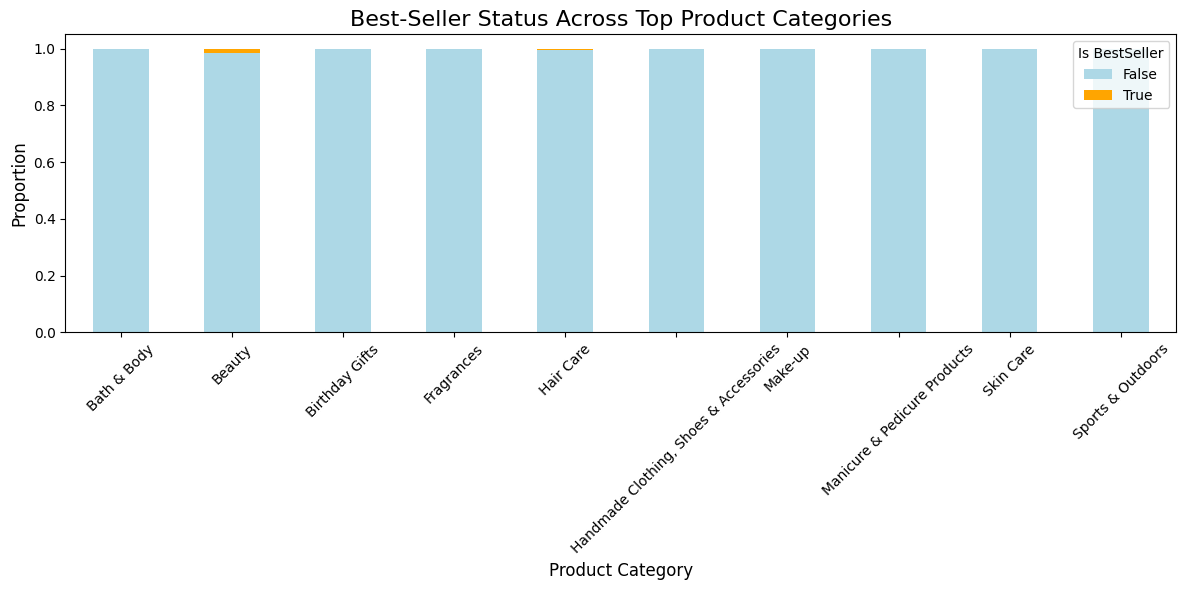

In [9]:
# Select the top 10 categories by total count
top_categories = df['category'].value_counts().head(10).index
filtered_df = df[df['category'].isin(top_categories)]

# Create a crosstab for the top categories
crosstab_top = pd.crosstab(filtered_df['category'], filtered_df['isBestSeller'], normalize='index')

# Plot the stacked bar chart
crosstab_top.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'orange'])

# Add chart title and labels
plt.title('Best-Seller Status Across Top Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Is BestSeller', labels=['False', 'True'], loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the updated DataFrame
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")

Original dataset size: 2443651
Dataset size after removing outliers: 2115963


C:\Users\Bruno\AppData\Local\Temp\ipykernel_33668\2953909200.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


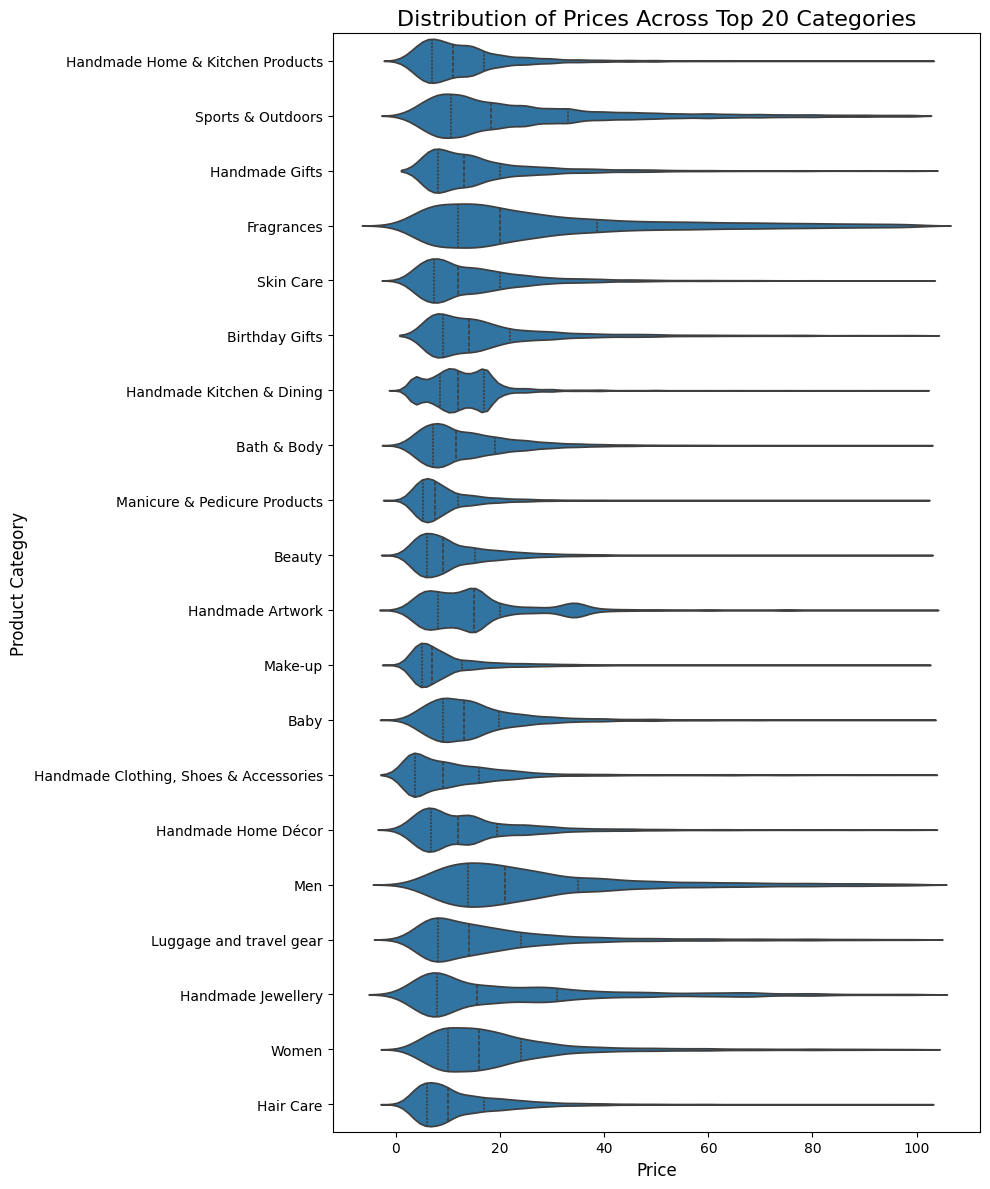

In [14]:
import seaborn as sns

# Filter for the top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
filtered_data = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create the violin plot
plt.figure(figsize=(10, 12))
sns.violinplot(
    y='category', 
    x='price', 
    data=filtered_data, 
    inner='quartile', 
    scale='width'
)
plt.title('Distribution of Prices Across Top 20 Categories', fontsize=16)
plt.ylabel('Product Category', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

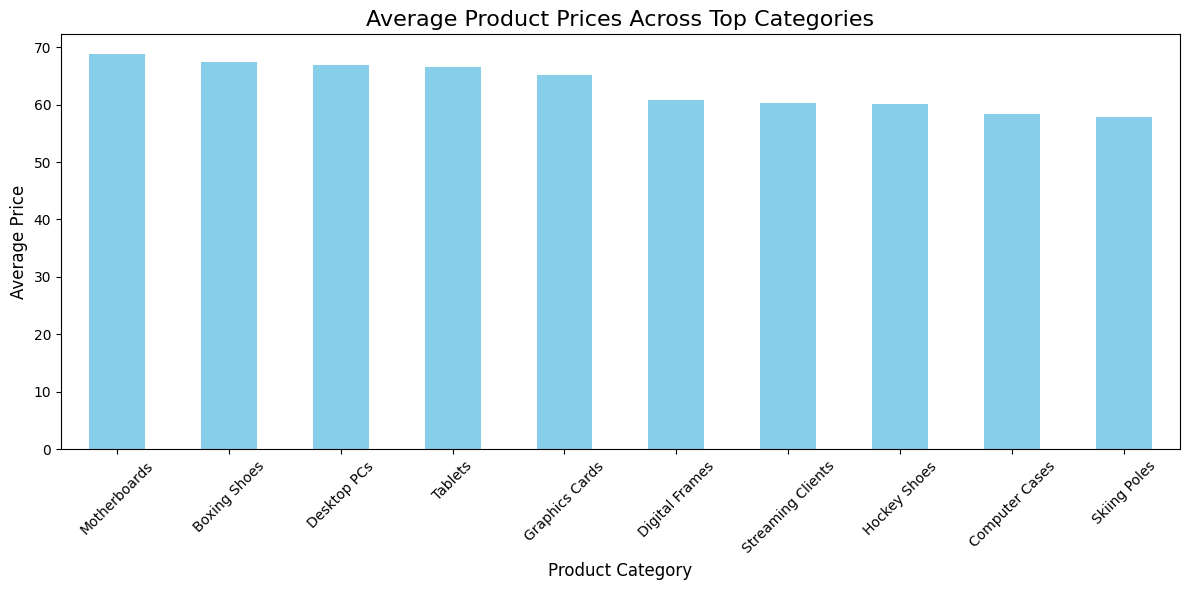

In [15]:
# Calculate average price for each category
avg_prices = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot the top 10 categories by average price
plt.figure(figsize=(12, 6))
avg_prices.head(10).plot(kind='bar', color='skyblue')
plt.title('Average Product Prices Across Top Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

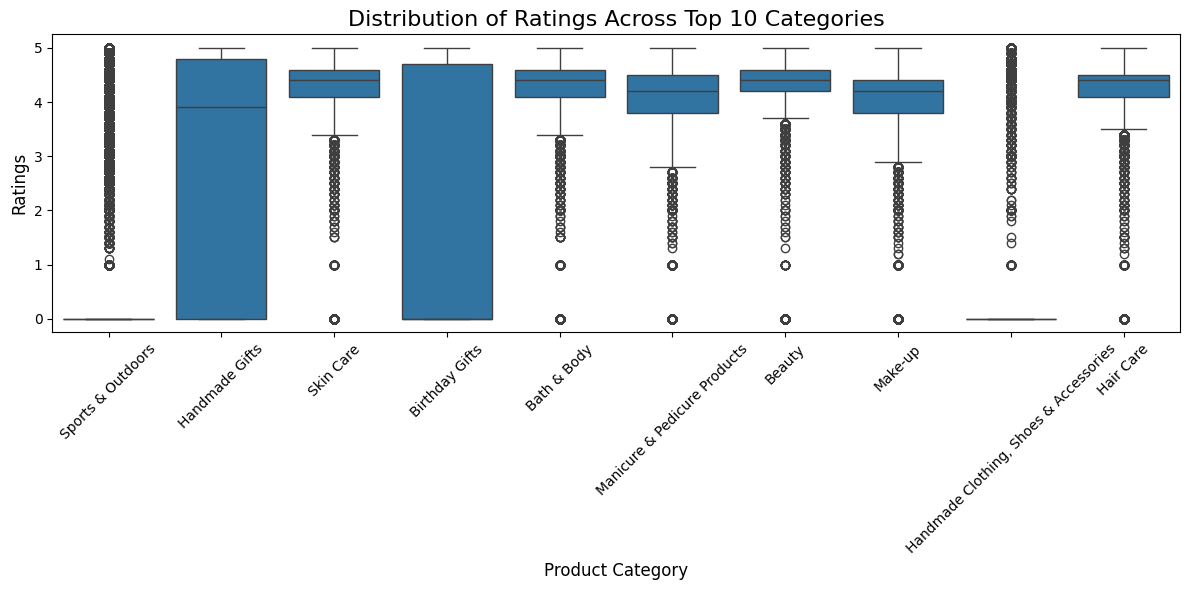

In [16]:
# Filter for the top 10 categories by count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
filtered_data = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=filtered_data)
plt.title('Distribution of Ratings Across Top 10 Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Calculate correlation coefficient between price and stars
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])

print(f"Correlation coefficient between price and stars: {correlation}")

Correlation coefficient between price and stars: -0.07767299878181444


In [ ]:
# A correlation of -0.0777 indicates a very weak negative relationship between price and product ratings. The weak correlation suggests that price is not a strong predictor of a product’s rating.

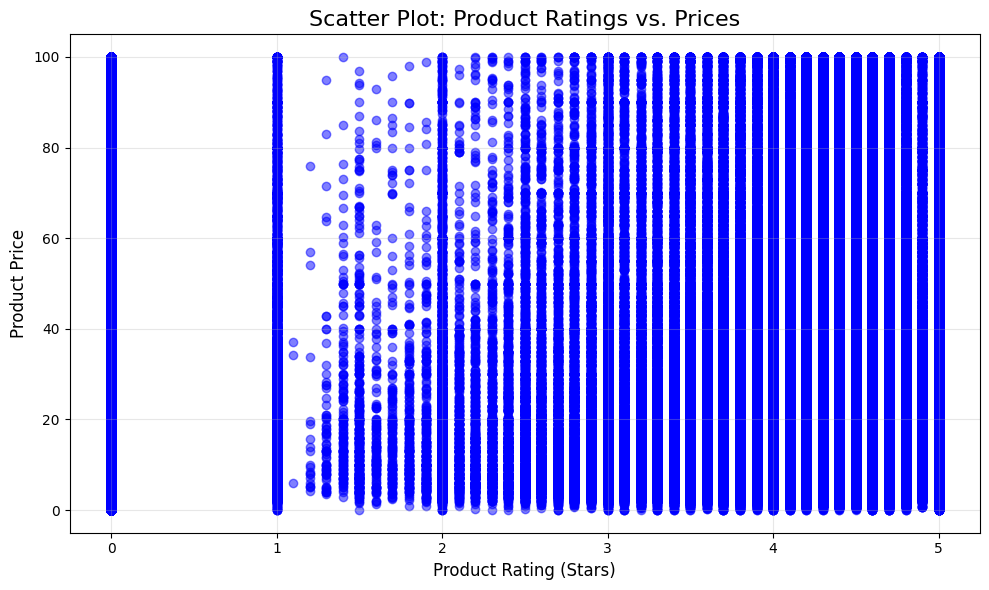

In [18]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5, c='blue')
plt.title('Scatter Plot: Product Ratings vs. Prices', fontsize=16)
plt.xlabel('Product Rating (Stars)', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Most of the points are concentrated at higher ratings (4 and above), which suggests that the majority of products in the dataset are well-rated.
# Prices are widely distributed, even for products with the same rating.
# Most products are clustered at higher ratings, implying overall customer satisfaction or bias toward positive reviews.

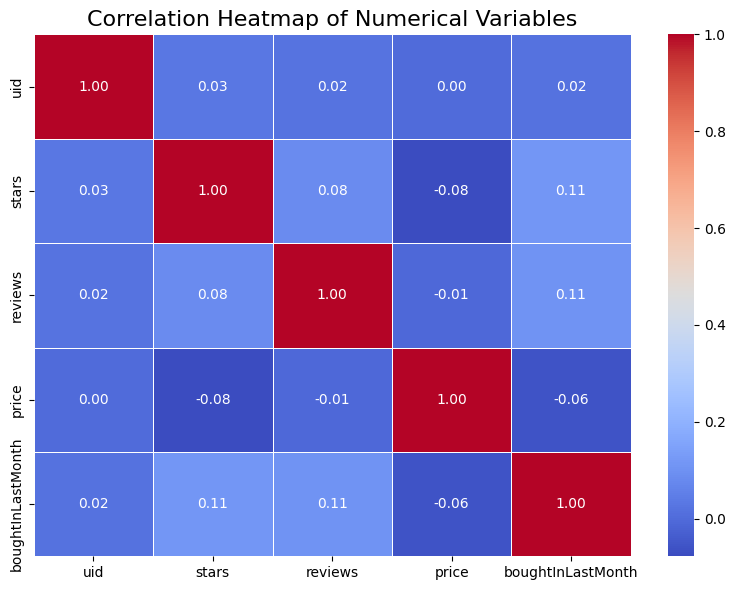

In [22]:
# Select only numeric columns for correlation
numeric_columns = df_no_outliers.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Most correlations are close to zero, suggesting that the numerical variables in this dataset are largely independent of one another.This suggests that factors influencing product ratings and sales are likely non-numerical (e.g., brand, category, product features).

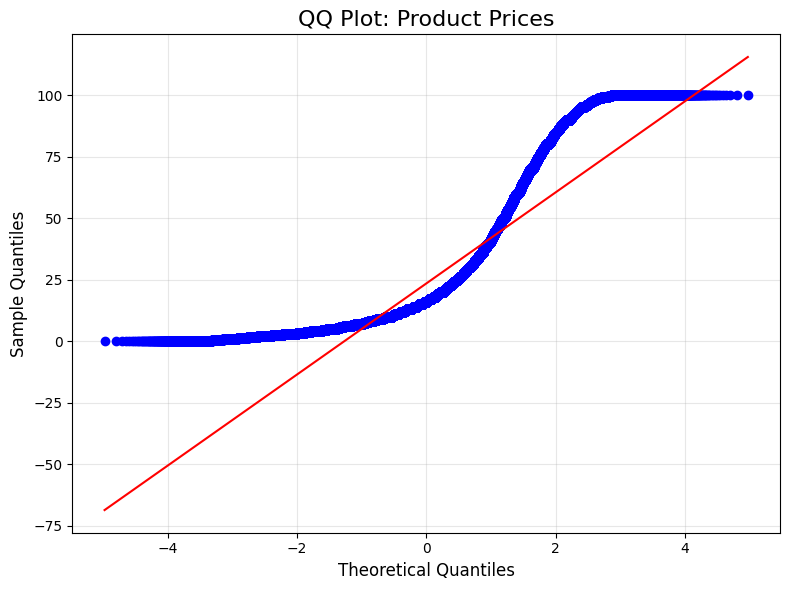

In [21]:
import scipy.stats as stats

# Generate QQ plot for price
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Product Prices', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()